# NLP/IMDB Movie Sentiment classification

The goal is to build a model able to predict the sentiment of a given review

## I. Data preprocessing :

### 1) Load the dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./data/IMDB-movie-reviews.csv', sep = ';',encoding='ISO-8859-1')

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df.shape

(100, 2)

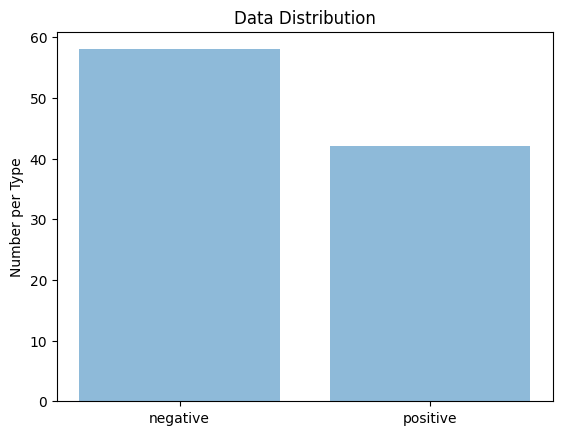

[58, 42]


In [5]:
objects = ('negative','positive')
y_pos = np.arange(len(objects))
performance = [len(df.loc[df.sentiment=='negative']),len(df.loc[df.sentiment=='positive'])]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number per Type')
plt.title('Data Distribution')
 
plt.show()
print(performance)

<Axes: xlabel='sentiment', ylabel='count'>

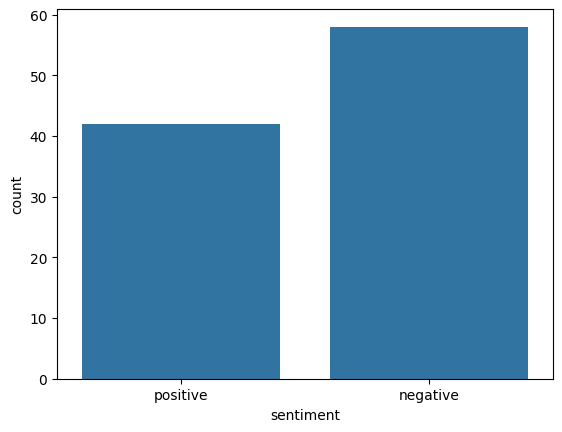

In [6]:
sns.countplot(data = df,x = 'sentiment')

### Import Libraries

In [7]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize as wt
from nltk.tokenize import punkt
from nltk.stem import PorterStemmer
from collections import defaultdict
from nltk.corpus import wordnet
from nltk import pos_tag
from collections import defaultdict
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [8]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\abelarbi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\abelarbi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abelarbi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
nltk.download('stopwords')
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abelarbi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
stopwords.append('film')
stopwords.append('movie')
stopwords.append('br')
stopwords.append('even')
stopwords.append('one')
stopwords.append('make')
stopwords.append('show')

#### Lowcase

In [11]:
df.review = df.review.apply(str.lower)

### 2) Remove stop words


In [12]:
def StopwordRm(text):
    filtred_text=''
    for word in text.split():
        if word not in stopwords:
            filtred_text = filtred_text + word+ ' '
    return filtred_text

In [13]:
df.review = df.review.apply(StopwordRm)

In [14]:
df.head()

,review,sentiment
0,reviewers mentioned watching 1 oz episode hook...,positive
1,wonderful little production. <br /><br />the f...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically there's family little boy (jake) thi...,negative
4,"petter mattei's ""love time money"" visually stu...",positive


### 3) Remove  indesired ponctuation 


In [15]:
import string
punkt = list(string.punctuation)

In [16]:
def PunctRm(text):
    filtred_text = ''
    for x in text:
      if x not in punkt:
            filtred_text = filtred_text + x
    return filtred_text

In [17]:
df.review = df.review.apply(PunctRm)

In [18]:
df.head()

,review,sentiment
0,reviewers mentioned watching 1 oz episode hook...,positive
1,wonderful little production br br the filming ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically theres family little boy jake thinks...,negative
4,petter matteis love time money visually stunni...,positive


### 4) Words lemmatization


In [19]:
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

In [20]:
lemmatizer = WordNetLemmatizer()

In [21]:
def Lemmetizer(text):
  filtred_text = ''
  for word in text.split():
          filtred_text = filtred_text + lemmatizer.lemmatize(word, get_wordnet_pos(word)) + ' '
  return filtred_text

In [22]:
df.review = df.review.apply(Lemmetizer)

In [23]:
df.head()

,review,sentiment
0,reviewer mention watch 1 oz episode hooked rig...,positive
1,wonderful little production br br the film tec...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically there family little boy jake think t...,negative
4,petter matteis love time money visually stun w...,positive


### WordCloud

In [24]:
pos_review=""
neg_review=""
for index,row in df.iterrows():
    if(row["sentiment"]=="positive"):
        pos_review=pos_review+" "+row["review"]
    else:
        neg_review=neg_review+" "+row["review"]

In [25]:
wordcloud_pos=WordCloud(max_font_size=100, max_words=100, background_color="white").generate(pos_review)
wordcloud_neg=WordCloud(max_font_size=100, max_words=100, background_color="white").generate(neg_review)

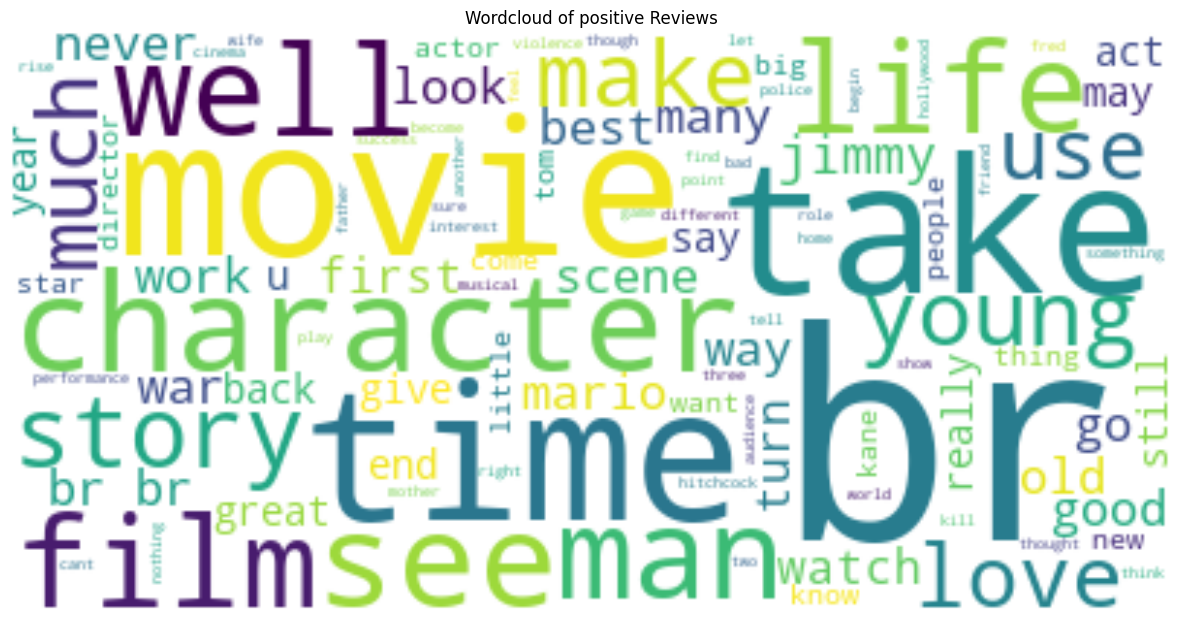

In [26]:
plt.figure(figsize=(15,15))
plt.imshow(wordcloud_pos, interpolation="bilinear")
plt.axis("off")
plt.title("Wordcloud of positive Reviews")
plt.show()

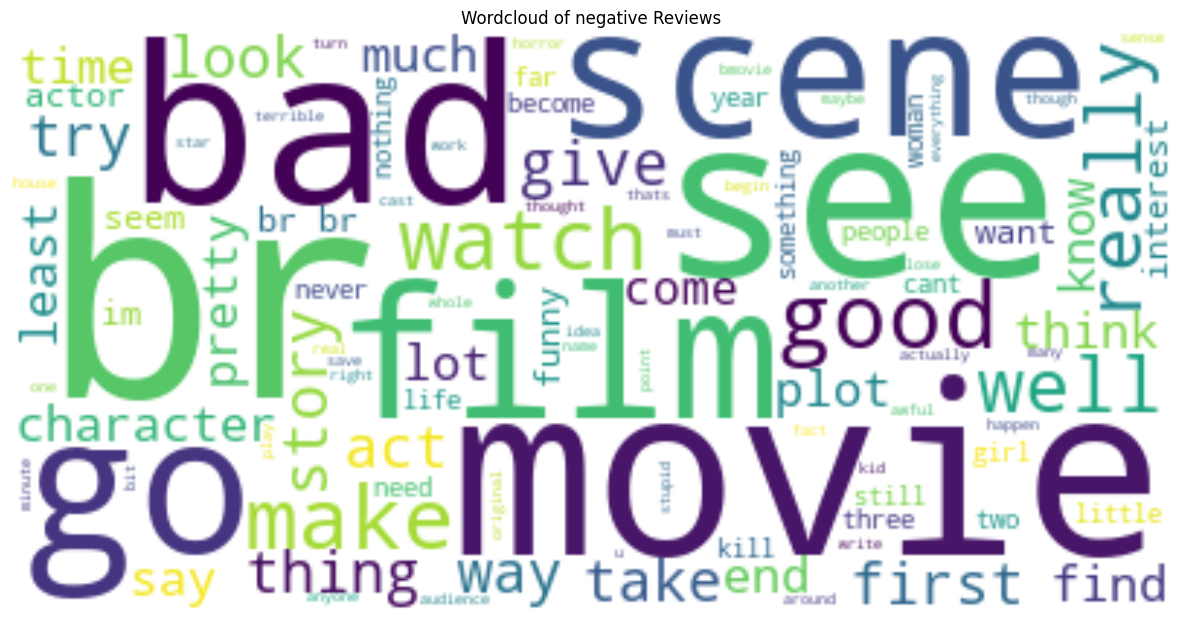

In [27]:
plt.figure(figsize=(15,15))
plt.imshow(wordcloud_neg, interpolation="bilinear")
plt.axis("off")
plt.title("Wordcloud of negative Reviews")
plt.show()

### label transform

In [28]:
for s in df['sentiment']:
    if s == 'positive':
        df.loc[df['sentiment'] == 'positive', 'sentiment'] = 1
    else:
        df.loc[df['sentiment'] == 'negative', 'sentiment'] = 0

In [29]:
df.rename(columns = {'sentiment':'labels'},inplace=True)

In [30]:
df

,review,labels
0,reviewer mention watch 1 oz episode hooked rig...,1
1,wonderful little production br br the film tec...,1
2,thought wonderful way spend time hot summer we...,1
3,basically there family little boy jake think t...,0
4,petter matteis love time money visually stun w...,1
...,...,...
95,daniel daylewis versatile actor alive english ...,1
96,guess would originally go least two part thus ...,0
97,well like watch bad horror bmovies cause think...,0
98,bad ever see well a bad probably ever see see ...,0


### 6) Split the dataset for training and testing


In [31]:
# x_train, x_test, y_train, y_test = train_test_split(df.review, onehot_encoded, test_size = 0.3,random_state=42)
train , test = train_test_split(df,train_size=0.7,stratify=df['labels'])

In [32]:
from datasets import Dataset
train_data = Dataset.from_pandas(train)
test_data = Dataset.from_pandas(test)

# Roberta Model

In [67]:
from transformers import RobertaTokenizerFast, RobertaForSequenceClassification,Trainer, TrainingArguments
import torch

In [68]:
# load model and tokenizer and define length of the text sequence
model = RobertaForSequenceClassification.from_pretrained('roberta-base')
tokenizer = RobertaTokenizerFast.from_pretrained('roberta-base', max_length = 512)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'lm_head.dense.weight', 'roberta.pooler.dense.bias', 'roberta.pooler.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifi

In [69]:
# define a function that will tokenize the model, and will return the relevant inputs for the model
def tokenization(batched_text):
    return tokenizer(batched_text['review'], padding = True, truncation=True)


train_data = train_data.map(tokenization, batched = True, batch_size = len(train_data))
test_data = test_data.map(tokenization, batched = True, batch_size = len(test_data))

Map:   0%|          | 0/70 [00:00<?, ? examples/s]

Map:   0%|          | 0/30 [00:00<?, ? examples/s]

In [70]:
train_data.set_format('torch', columns=['input_ids', 'attention_mask', 'labels'])
test_data.set_format('torch', columns=['input_ids', 'attention_mask', 'labels'])

In [71]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
# define accuracy metrics
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

In [72]:
# define the training arguments
training_args = TrainingArguments(
    output_dir = './results',
    num_train_epochs=10,
    per_device_train_batch_size = 2,
    per_device_eval_batch_size= 2,
    evaluation_strategy = "epoch",
    save_strategy = "epoch",
    disable_tqdm = False, 
    load_best_model_at_end=True,
    warmup_steps=500,
    weight_decay=0.01,
    logging_steps = 8,
    save_total_limit = 2,
    fp16 = False,
    dataloader_num_workers = 0,
    run_name = 'roberta-classification'
)

In [73]:
# instantiate the trainer class and check for available devices
trainer = Trainer(
    model=model,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=train_data,
    eval_dataset=test_data
)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [74]:
# train the model
trainer.train()

  0%|          | 0/350 [00:00<?, ?it/s]

{'loss': 0.6775, 'learning_rate': 8.000000000000001e-07, 'epoch': 0.23}
{'loss': 0.7233, 'learning_rate': 1.6000000000000001e-06, 'epoch': 0.46}
{'loss': 0.6767, 'learning_rate': 2.4000000000000003e-06, 'epoch': 0.69}
{'loss': 0.7012, 'learning_rate': 3.2000000000000003e-06, 'epoch': 0.91}


  0%|          | 0/15 [00:00<?, ?it/s]

{'eval_loss': 0.6872936487197876, 'eval_accuracy': 0.5666666666666667, 'eval_f1': 0.0, 'eval_precision': 0.0, 'eval_recall': 0.0, 'eval_runtime': 19.7511, 'eval_samples_per_second': 1.519, 'eval_steps_per_second': 0.759, 'epoch': 1.0}
{'loss': 0.6914, 'learning_rate': 4.000000000000001e-06, 'epoch': 1.14}
{'loss': 0.6742, 'learning_rate': 4.800000000000001e-06, 'epoch': 1.37}
{'loss': 0.6869, 'learning_rate': 5.600000000000001e-06, 'epoch': 1.6}
{'loss': 0.7075, 'learning_rate': 6.4000000000000006e-06, 'epoch': 1.83}


  0%|          | 0/15 [00:00<?, ?it/s]

{'eval_loss': 0.6769399046897888, 'eval_accuracy': 0.5666666666666667, 'eval_f1': 0.0, 'eval_precision': 0.0, 'eval_recall': 0.0, 'eval_runtime': 21.9584, 'eval_samples_per_second': 1.366, 'eval_steps_per_second': 0.683, 'epoch': 2.0}
{'loss': 0.6457, 'learning_rate': 7.2e-06, 'epoch': 2.06}
{'loss': 0.66, 'learning_rate': 8.000000000000001e-06, 'epoch': 2.29}
{'loss': 0.6136, 'learning_rate': 8.8e-06, 'epoch': 2.51}
{'loss': 0.7767, 'learning_rate': 9.600000000000001e-06, 'epoch': 2.74}
{'loss': 0.7183, 'learning_rate': 1.04e-05, 'epoch': 2.97}


  0%|          | 0/15 [00:00<?, ?it/s]

{'eval_loss': 0.664786159992218, 'eval_accuracy': 0.5666666666666667, 'eval_f1': 0.0, 'eval_precision': 0.0, 'eval_recall': 0.0, 'eval_runtime': 26.7353, 'eval_samples_per_second': 1.122, 'eval_steps_per_second': 0.561, 'epoch': 3.0}
{'loss': 0.689, 'learning_rate': 1.1200000000000001e-05, 'epoch': 3.2}
{'loss': 0.5918, 'learning_rate': 1.2e-05, 'epoch': 3.43}
{'loss': 0.585, 'learning_rate': 1.2800000000000001e-05, 'epoch': 3.66}
{'loss': 0.7785, 'learning_rate': 1.3600000000000002e-05, 'epoch': 3.89}


  0%|          | 0/15 [00:00<?, ?it/s]

{'eval_loss': 0.5921269059181213, 'eval_accuracy': 0.6333333333333333, 'eval_f1': 0.2666666666666667, 'eval_precision': 1.0, 'eval_recall': 0.15384615384615385, 'eval_runtime': 24.2991, 'eval_samples_per_second': 1.235, 'eval_steps_per_second': 0.617, 'epoch': 4.0}
{'loss': 0.6372, 'learning_rate': 1.44e-05, 'epoch': 4.11}
{'loss': 0.5686, 'learning_rate': 1.52e-05, 'epoch': 4.34}
{'loss': 0.7562, 'learning_rate': 1.6000000000000003e-05, 'epoch': 4.57}
{'loss': 0.5863, 'learning_rate': 1.6800000000000002e-05, 'epoch': 4.8}


  0%|          | 0/15 [00:00<?, ?it/s]

{'eval_loss': 1.1661089658737183, 'eval_accuracy': 0.43333333333333335, 'eval_f1': 0.6046511627906976, 'eval_precision': 0.43333333333333335, 'eval_recall': 1.0, 'eval_runtime': 26.4834, 'eval_samples_per_second': 1.133, 'eval_steps_per_second': 0.566, 'epoch': 5.0}
{'loss': 0.9118, 'learning_rate': 1.76e-05, 'epoch': 5.03}
{'loss': 0.7013, 'learning_rate': 1.84e-05, 'epoch': 5.26}
{'loss': 0.6172, 'learning_rate': 1.9200000000000003e-05, 'epoch': 5.49}
{'loss': 0.697, 'learning_rate': 2e-05, 'epoch': 5.71}
{'loss': 0.6114, 'learning_rate': 2.08e-05, 'epoch': 5.94}


  0%|          | 0/15 [00:00<?, ?it/s]

{'eval_loss': 1.203925371170044, 'eval_accuracy': 0.7, 'eval_f1': 0.47058823529411764, 'eval_precision': 1.0, 'eval_recall': 0.3076923076923077, 'eval_runtime': 25.129, 'eval_samples_per_second': 1.194, 'eval_steps_per_second': 0.597, 'epoch': 6.0}
{'loss': 0.6262, 'learning_rate': 2.16e-05, 'epoch': 6.17}
{'loss': 0.2017, 'learning_rate': 2.2400000000000002e-05, 'epoch': 6.4}
{'loss': 0.4313, 'learning_rate': 2.32e-05, 'epoch': 6.63}
{'loss': 0.0123, 'learning_rate': 2.4e-05, 'epoch': 6.86}


  0%|          | 0/15 [00:00<?, ?it/s]

{'eval_loss': 2.4178049564361572, 'eval_accuracy': 0.6666666666666666, 'eval_f1': 0.375, 'eval_precision': 1.0, 'eval_recall': 0.23076923076923078, 'eval_runtime': 25.4782, 'eval_samples_per_second': 1.177, 'eval_steps_per_second': 0.589, 'epoch': 7.0}
{'loss': 0.0046, 'learning_rate': 2.48e-05, 'epoch': 7.09}
{'loss': 0.4044, 'learning_rate': 2.5600000000000002e-05, 'epoch': 7.31}
{'loss': 0.2308, 'learning_rate': 2.64e-05, 'epoch': 7.54}
{'loss': 0.8668, 'learning_rate': 2.7200000000000004e-05, 'epoch': 7.77}
{'loss': 1.41, 'learning_rate': 2.8000000000000003e-05, 'epoch': 8.0}


  0%|          | 0/15 [00:00<?, ?it/s]

{'eval_loss': 1.4359705448150635, 'eval_accuracy': 0.6333333333333333, 'eval_f1': 0.2666666666666667, 'eval_precision': 1.0, 'eval_recall': 0.15384615384615385, 'eval_runtime': 26.7078, 'eval_samples_per_second': 1.123, 'eval_steps_per_second': 0.562, 'epoch': 8.0}
{'loss': 0.3344, 'learning_rate': 2.88e-05, 'epoch': 8.23}
{'loss': 1.0103, 'learning_rate': 2.96e-05, 'epoch': 8.46}
{'loss': 0.0051, 'learning_rate': 3.04e-05, 'epoch': 8.69}
{'loss': 0.002, 'learning_rate': 3.12e-05, 'epoch': 8.91}


  0%|          | 0/15 [00:00<?, ?it/s]

{'eval_loss': 1.807887315750122, 'eval_accuracy': 0.7, 'eval_f1': 0.5263157894736842, 'eval_precision': 0.8333333333333334, 'eval_recall': 0.38461538461538464, 'eval_runtime': 29.8408, 'eval_samples_per_second': 1.005, 'eval_steps_per_second': 0.503, 'epoch': 9.0}
{'loss': 0.3667, 'learning_rate': 3.2000000000000005e-05, 'epoch': 9.14}
{'loss': 0.0451, 'learning_rate': 3.2800000000000004e-05, 'epoch': 9.37}
{'loss': 0.0005, 'learning_rate': 3.3600000000000004e-05, 'epoch': 9.6}
{'loss': 0.4929, 'learning_rate': 3.4399999999999996e-05, 'epoch': 9.83}


  0%|          | 0/15 [00:00<?, ?it/s]

{'eval_loss': 1.3449428081512451, 'eval_accuracy': 0.7, 'eval_f1': 0.5714285714285714, 'eval_precision': 0.75, 'eval_recall': 0.46153846153846156, 'eval_runtime': 30.6838, 'eval_samples_per_second': 0.978, 'eval_steps_per_second': 0.489, 'epoch': 10.0}
{'train_runtime': 1981.7411, 'train_samples_per_second': 0.353, 'train_steps_per_second': 0.177, 'train_loss': 0.5620193717628718, 'epoch': 10.0}


TrainOutput(global_step=350, training_loss=0.5620193717628718, metrics={'train_runtime': 1981.7411, 'train_samples_per_second': 0.353, 'train_steps_per_second': 0.177, 'train_loss': 0.5620193717628718, 'epoch': 10.0})

In [75]:
trainer.evaluate()

  0%|          | 0/15 [00:00<?, ?it/s]

{'eval_loss': 0.5921269059181213,
 'eval_accuracy': 0.6333333333333333,
 'eval_f1': 0.2666666666666667,
 'eval_precision': 1.0,
 'eval_recall': 0.15384615384615385,
 'eval_runtime': 31.2752,
 'eval_samples_per_second': 0.959,
 'eval_steps_per_second': 0.48,
 'epoch': 10.0}

# Distilbert Model

In [45]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification,Trainer, TrainingArguments
import torch

In [46]:
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased')
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'pre_classifier.weight', 'pre_clas

In [47]:
# define a function that will tokenize the model, and will return the relevant inputs for the model
def tokenization(batched_text):
    return tokenizer(batched_text['review'], padding = True, truncation=True)


train_data = train_data.map(tokenization, batched = True, batch_size = len(train_data))
test_data = test_data.map(tokenization, batched = True, batch_size = len(test_data))

Map:   0%|          | 0/70 [00:00<?, ? examples/s]

Map:   0%|          | 0/30 [00:00<?, ? examples/s]

In [48]:
train_data.set_format('torch', columns=['input_ids', 'attention_mask', 'labels'])
test_data.set_format('torch', columns=['input_ids', 'attention_mask', 'labels'])

In [49]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
# define accuracy metrics
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

In [54]:
# define the training arguments
training_args = TrainingArguments(
    output_dir = './results',
    num_train_epochs=10,
    per_device_train_batch_size = 2,
    per_device_eval_batch_size= 2,
    evaluation_strategy = "epoch",
    save_strategy = "epoch",
    disable_tqdm = False, 
    load_best_model_at_end=True,
    warmup_steps=500,
    weight_decay=0.01,
    logging_steps = 8,
    fp16 = False,
    logging_dir='./logs',
    dataloader_num_workers = 0,
    run_name = 'distillbert-classification'
)

In [55]:
# instantiate the trainer class and check for available devices
trainer = Trainer(
    model=model,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=train_data,
    eval_dataset=test_data
)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [56]:
# train the model
trainer.train()

  0%|          | 0/350 [00:00<?, ?it/s]

{'loss': 0.5383, 'learning_rate': 8.000000000000001e-07, 'epoch': 0.23}
{'loss': 0.6316, 'learning_rate': 1.6000000000000001e-06, 'epoch': 0.46}
{'loss': 0.5554, 'learning_rate': 2.4000000000000003e-06, 'epoch': 0.69}
{'loss': 0.5385, 'learning_rate': 3.2000000000000003e-06, 'epoch': 0.91}


  0%|          | 0/15 [00:00<?, ?it/s]

{'eval_loss': 0.6173577904701233, 'eval_accuracy': 0.6, 'eval_f1': 0.14285714285714288, 'eval_precision': 1.0, 'eval_recall': 0.07692307692307693, 'eval_runtime': 10.196, 'eval_samples_per_second': 2.942, 'eval_steps_per_second': 1.471, 'epoch': 1.0}
{'loss': 0.5404, 'learning_rate': 4.000000000000001e-06, 'epoch': 1.14}
{'loss': 0.4658, 'learning_rate': 4.800000000000001e-06, 'epoch': 1.37}
{'loss': 0.4458, 'learning_rate': 5.600000000000001e-06, 'epoch': 1.6}
{'loss': 0.4869, 'learning_rate': 6.4000000000000006e-06, 'epoch': 1.83}


  0%|          | 0/15 [00:00<?, ?it/s]

{'eval_loss': 0.632664680480957, 'eval_accuracy': 0.6, 'eval_f1': 0.25, 'eval_precision': 0.6666666666666666, 'eval_recall': 0.15384615384615385, 'eval_runtime': 10.2659, 'eval_samples_per_second': 2.922, 'eval_steps_per_second': 1.461, 'epoch': 2.0}
{'loss': 0.3853, 'learning_rate': 7.2e-06, 'epoch': 2.06}
{'loss': 0.3044, 'learning_rate': 8.000000000000001e-06, 'epoch': 2.29}
{'loss': 0.4276, 'learning_rate': 8.8e-06, 'epoch': 2.51}
{'loss': 0.473, 'learning_rate': 9.600000000000001e-06, 'epoch': 2.74}
{'loss': 0.3349, 'learning_rate': 1.04e-05, 'epoch': 2.97}


  0%|          | 0/15 [00:00<?, ?it/s]

{'eval_loss': 0.6512945890426636, 'eval_accuracy': 0.6666666666666666, 'eval_f1': 0.5, 'eval_precision': 0.7142857142857143, 'eval_recall': 0.38461538461538464, 'eval_runtime': 10.4268, 'eval_samples_per_second': 2.877, 'eval_steps_per_second': 1.439, 'epoch': 3.0}
{'loss': 0.3175, 'learning_rate': 1.1200000000000001e-05, 'epoch': 3.2}
{'loss': 0.1045, 'learning_rate': 1.2e-05, 'epoch': 3.43}
{'loss': 0.2019, 'learning_rate': 1.2800000000000001e-05, 'epoch': 3.66}
{'loss': 0.4766, 'learning_rate': 1.3600000000000002e-05, 'epoch': 3.89}


  0%|          | 0/15 [00:00<?, ?it/s]

{'eval_loss': 1.0222593545913696, 'eval_accuracy': 0.5666666666666667, 'eval_f1': 0.23529411764705882, 'eval_precision': 0.5, 'eval_recall': 0.15384615384615385, 'eval_runtime': 10.3399, 'eval_samples_per_second': 2.901, 'eval_steps_per_second': 1.451, 'epoch': 4.0}
{'loss': 0.1456, 'learning_rate': 1.44e-05, 'epoch': 4.11}
{'loss': 0.0397, 'learning_rate': 1.52e-05, 'epoch': 4.34}
{'loss': 0.0545, 'learning_rate': 1.6000000000000003e-05, 'epoch': 4.57}
{'loss': 0.0159, 'learning_rate': 1.6800000000000002e-05, 'epoch': 4.8}


  0%|          | 0/15 [00:00<?, ?it/s]

{'eval_loss': 1.069704294204712, 'eval_accuracy': 0.7333333333333333, 'eval_f1': 0.7499999999999999, 'eval_precision': 0.631578947368421, 'eval_recall': 0.9230769230769231, 'eval_runtime': 10.2962, 'eval_samples_per_second': 2.914, 'eval_steps_per_second': 1.457, 'epoch': 5.0}
{'loss': 0.0432, 'learning_rate': 1.76e-05, 'epoch': 5.03}
{'loss': 0.0097, 'learning_rate': 1.84e-05, 'epoch': 5.26}
{'loss': 0.0179, 'learning_rate': 1.9200000000000003e-05, 'epoch': 5.49}
{'loss': 0.0109, 'learning_rate': 2e-05, 'epoch': 5.71}
{'loss': 0.0045, 'learning_rate': 2.08e-05, 'epoch': 5.94}


  0%|          | 0/15 [00:00<?, ?it/s]

{'eval_loss': 1.4175803661346436, 'eval_accuracy': 0.7, 'eval_f1': 0.5714285714285714, 'eval_precision': 0.75, 'eval_recall': 0.46153846153846156, 'eval_runtime': 10.2224, 'eval_samples_per_second': 2.935, 'eval_steps_per_second': 1.467, 'epoch': 6.0}
{'loss': 0.0035, 'learning_rate': 2.16e-05, 'epoch': 6.17}
{'loss': 0.0034, 'learning_rate': 2.2400000000000002e-05, 'epoch': 6.4}
{'loss': 0.0029, 'learning_rate': 2.32e-05, 'epoch': 6.63}
{'loss': 0.0023, 'learning_rate': 2.4e-05, 'epoch': 6.86}


  0%|          | 0/15 [00:00<?, ?it/s]

{'eval_loss': 1.144041657447815, 'eval_accuracy': 0.6666666666666666, 'eval_f1': 0.6153846153846154, 'eval_precision': 0.6153846153846154, 'eval_recall': 0.6153846153846154, 'eval_runtime': 10.3573, 'eval_samples_per_second': 2.897, 'eval_steps_per_second': 1.448, 'epoch': 7.0}
{'loss': 0.002, 'learning_rate': 2.48e-05, 'epoch': 7.09}
{'loss': 0.0018, 'learning_rate': 2.5600000000000002e-05, 'epoch': 7.31}
{'loss': 0.0016, 'learning_rate': 2.64e-05, 'epoch': 7.54}
{'loss': 0.0014, 'learning_rate': 2.7200000000000004e-05, 'epoch': 7.77}
{'loss': 0.0015, 'learning_rate': 2.8000000000000003e-05, 'epoch': 8.0}


  0%|          | 0/15 [00:00<?, ?it/s]

{'eval_loss': 1.494078278541565, 'eval_accuracy': 0.7333333333333333, 'eval_f1': 0.6363636363636364, 'eval_precision': 0.7777777777777778, 'eval_recall': 0.5384615384615384, 'eval_runtime': 10.2144, 'eval_samples_per_second': 2.937, 'eval_steps_per_second': 1.469, 'epoch': 8.0}
{'loss': 0.0015, 'learning_rate': 2.88e-05, 'epoch': 8.23}
{'loss': 0.0011, 'learning_rate': 2.96e-05, 'epoch': 8.46}
{'loss': 0.001, 'learning_rate': 3.04e-05, 'epoch': 8.69}
{'loss': 0.0009, 'learning_rate': 3.12e-05, 'epoch': 8.91}


  0%|          | 0/15 [00:00<?, ?it/s]

{'eval_loss': 1.4329915046691895, 'eval_accuracy': 0.7666666666666667, 'eval_f1': 0.6956521739130435, 'eval_precision': 0.8, 'eval_recall': 0.6153846153846154, 'eval_runtime': 10.6458, 'eval_samples_per_second': 2.818, 'eval_steps_per_second': 1.409, 'epoch': 9.0}
{'loss': 0.0008, 'learning_rate': 3.2000000000000005e-05, 'epoch': 9.14}
{'loss': 0.0007, 'learning_rate': 3.2800000000000004e-05, 'epoch': 9.37}
{'loss': 0.0007, 'learning_rate': 3.3600000000000004e-05, 'epoch': 9.6}
{'loss': 0.0006, 'learning_rate': 3.4399999999999996e-05, 'epoch': 9.83}


  0%|          | 0/15 [00:00<?, ?it/s]

{'eval_loss': 1.580955982208252, 'eval_accuracy': 0.7666666666666667, 'eval_f1': 0.6956521739130435, 'eval_precision': 0.8, 'eval_recall': 0.6153846153846154, 'eval_runtime': 10.7734, 'eval_samples_per_second': 2.785, 'eval_steps_per_second': 1.392, 'epoch': 10.0}
{'train_runtime': 862.1391, 'train_samples_per_second': 0.812, 'train_steps_per_second': 0.406, 'train_loss': 0.17367532206300113, 'epoch': 10.0}


TrainOutput(global_step=350, training_loss=0.17367532206300113, metrics={'train_runtime': 862.1391, 'train_samples_per_second': 0.812, 'train_steps_per_second': 0.406, 'train_loss': 0.17367532206300113, 'epoch': 10.0})

In [57]:
trainer.evaluate()

  0%|          | 0/15 [00:00<?, ?it/s]

{'eval_loss': 0.6173577904701233,
 'eval_accuracy': 0.6,
 'eval_f1': 0.14285714285714288,
 'eval_precision': 1.0,
 'eval_recall': 0.07692307692307693,
 'eval_runtime': 6.5676,
 'eval_samples_per_second': 4.568,
 'eval_steps_per_second': 2.284,
 'epoch': 10.0}

# Use a Bigger DataSet

In [275]:
from torch.utils.data import Dataset, DataLoader
from datasets import load_dataset

In [276]:
train_data, test_data = datasets.load_dataset('mteb/imdb', split =['train[:10%]', 'test[:10%]'])

Found cached dataset json (C:/Users/abelarbi/.cache/huggingface/datasets/mteb___json/mteb--imdb-bcb4fc83ae684a90/0.0.0/fe5dd6ea2639a6df622901539cb550cf8797e5a6b2dd7af1cf934bed8e233e6e)


  0%|          | 0/2 [00:00<?, ?it/s]

In [277]:
# load model and tokenizer and define length of the text sequence
model = RobertaForSequenceClassification.from_pretrained('roberta-base')
tokenizer = RobertaTokenizerFast.from_pretrained('roberta-base', max_length = 512)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.layer_norm.weight', 'roberta.pooler.dense.bias', 'lm_head.dense.bias', 'roberta.pooler.dense.weight', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifi

In [278]:
# define a function that will tokenize the model, and will return the relevant inputs for the model
def tokenization(batched_text):
    return tokenizer(batched_text['text'], padding = True, truncation=True)


train_data = train_data.map(tokenization, batched = True, batch_size = len(train_data))
test_data = test_data.map(tokenization, batched = True, batch_size = len(test_data))

Map:   0%|          | 0/2500 [00:00<?, ? examples/s]

Map:   0%|          | 0/2500 [00:00<?, ? examples/s]

In [279]:
train_data.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])
test_data.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])

In [280]:
# define the training arguments
training_args = TrainingArguments(
    output_dir = './results',
    num_train_epochs=3,
    per_device_train_batch_size = 4,
    gradient_accumulation_steps = 16,    
    per_device_eval_batch_size= 8,
    evaluation_strategy = "epoch",
    save_strategy = "epoch",
    disable_tqdm = False, 
    load_best_model_at_end=True,
    warmup_steps=500,
    weight_decay=0.01,
    logging_steps = 8,
    fp16 = False,
    logging_dir='./logs',
    dataloader_num_workers = 0,
    run_name = 'roberta-classification_large'
)

In [281]:
# instantiate the trainer class and check for available devices
trainer = Trainer(
    model=model,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=train_data,
    eval_dataset=test_data
)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [282]:
# train the model
trainer.train()

  0%|          | 0/117 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
trainer.evaluate()